In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv('spam.csv', encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Cleaning

In [3]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)
df.head(2)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...


In [4]:
df.rename(columns={'v1':'label', 'v2':'text'}, inplace=True)

In [5]:
df.sample(5)

,label,text
1214,ham,I'll text now! All creepy like so he won't thi...
1704,ham,What can i do? Might accidant tookplace betwee...
1615,ham,Mm i had my food da from out
2617,ham,I cant pick the phone right now. Pls send a me...
5076,ham,"Guy, no flash me now. If you go call me, call ..."


In [6]:
def label_to_num(label):
    if label == 'spam':
        return 1
    else:
        return 0

df['label']=df['label'].apply(label_to_num)
df.sample(5)

,label,text
1873,1,You have WON a guaranteed å£1000 cash or a å£2...
4117,0,Watch lor. I saw a few swatch one i thk quite ...
334,1,Valentines Day Special! Win over å£1000 in our...
1157,0,He's an adult and would learn from the experie...
3550,0,I love you both too :-)


In [7]:
df.duplicated().sum()

403

In [8]:
df.drop_duplicates(keep='first', inplace=True)

##  EDA

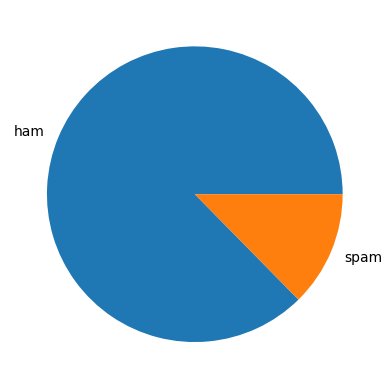

In [9]:
import matplotlib.pyplot as plt
plt.pie(df['label'].value_counts(), labels=['ham', 'spam'])
plt.show()

In [10]:
import nltk
df['num_characters']=df['text'].apply(len)
df.sample(5)

,label,text,num_characters
2217,0,* Will have two more cartons off u and is very...,67
1171,1,Got what it takes 2 take part in the WRC Rally...,159
1239,0,Hope you are having a great new semester. Do w...,96
3956,0,Where is that one day training:-),33
1282,0,Ever green quote ever told by Jerry in cartoon...,160


In [11]:
#number of words
df['num_words']=df['text'].apply(lambda x: len(x.split()))
df.sample(5)

,label,text,num_characters,num_words
3889,1,Double Mins & 1000 txts on Orange tariffs. Lat...,151,22
5551,0,Wen did you get so spiritual and deep. That's ...,51,10
623,0,"sorry, no, have got few things to do. may be i...",58,13
3906,0,No that just means you have a fat head,38,9
4951,1,"Welcome to Select, an O2 service with added be...",140,24


In [12]:
#number of sentences
df['num_sentences']=df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(3)

,label,text,num_characters,num_words,num_sentences
3300,1,RCT' THNQ Adrian for U text. Rgds Vatian,40,8,2
455,0,Si si. I think ill go make those oreo truffles.,47,10,2
5041,1,Jamster! To get your free wallpaper text HEART...,109,19,6


In [13]:
df[['num_characters', 'num_sentences', 'num_words']].describe()

,num_characters,num_sentences,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,15.340685
std,58.236293,1.448541,11.068488
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,7.000000
50%,60.000000,1.000000,12.000000
75%,117.000000,2.000000,22.000000
max,910.000000,38.000000,171.000000


In [14]:
df_ham=df[df['label']==0]
df_spam=df[df['label']==1]

In [15]:
df_ham.describe()

,label,num_characters,num_words,num_sentences
count,4516.0,4516.000000,4516.000000,4516.000000
mean,0.0,70.459256,14.134632,1.820195
std,0.0,56.358207,11.116240,1.383657
min,0.0,2.000000,1.000000,1.000000
25%,0.0,34.000000,7.000000,1.000000
50%,0.0,52.000000,11.000000,1.000000
75%,0.0,90.000000,18.000000,2.000000
max,0.0,910.000000,171.000000,38.000000


In [16]:
df_spam.describe()

,label,num_characters,num_words,num_sentences
count,653.0,653.000000,653.000000,653.000000
mean,1.0,137.891271,23.681470,2.970904
std,0.0,30.137753,5.967672,1.488425
min,1.0,13.000000,2.000000,1.000000
25%,1.0,132.000000,22.000000,2.000000
50%,1.0,149.000000,25.000000,3.000000
75%,1.0,157.000000,28.000000,4.000000
max,1.0,224.000000,35.000000,9.000000


In [17]:
#spam messages are longer

(array([3.428e+03, 9.650e+02, 7.400e+01, 3.000e+01, 1.100e+01, 3.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([  2. ,  92.8, 183.6, 274.4, 365.2, 456. , 546.8, 637.6, 728.4,
        819.2, 910. ]),
 <BarContainer object of 10 artists>)

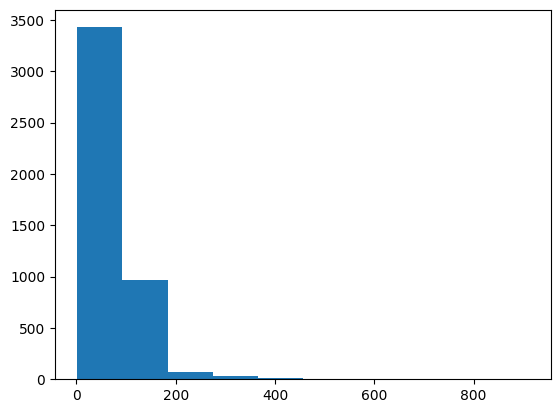

In [18]:
plt.hist(df_ham['num_characters'])

(array([  7.,  16.,  23.,  23.,  47., 114., 358.,  62.,   2.,   1.]),
 array([ 13. ,  34.1,  55.2,  76.3,  97.4, 118.5, 139.6, 160.7, 181.8,
        202.9, 224. ]),
 <BarContainer object of 10 artists>)

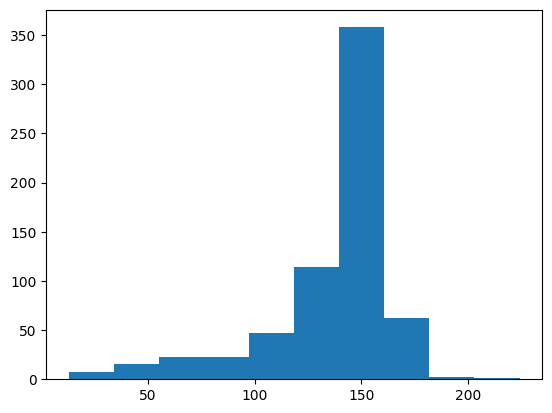

In [19]:
plt.hist(df_spam['num_characters'])

<Axes: xlabel='num_words'>

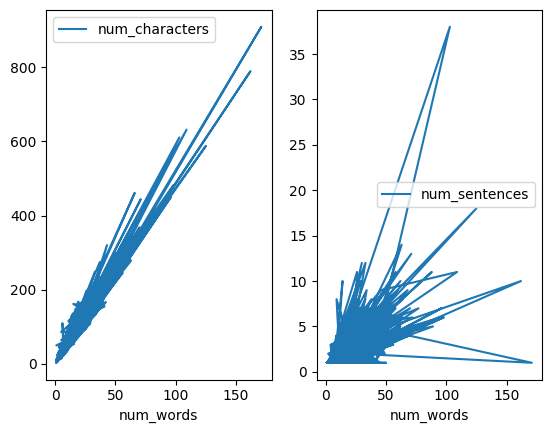

In [25]:
fig, axes=plt.subplots(1,2)

df.plot(kind='line', x='num_words', y='num_characters', ax=axes[0])
df.plot(kind='line', x='num_words', y='num_sentences', ax=axes[1])

<Axes: >

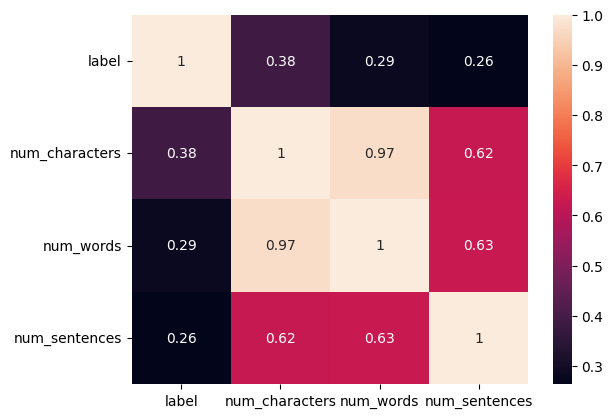

In [ ]:
import seaborn as sns
sns.heatmap(df.drop(columns=['text']).corr(), annot=True)

In [29]:
#we can train the model only on num_characters

### Text Preprocessing
1. Remove special characters
2. Remove stopwords

In [41]:
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

def transform_text(text:str):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for word in text:
        if word.isalnum():
            y.append(word)
    
    text=y
    y=[]
    
    ps=PorterStemmer()

    for word in text:
        if word not in stopwords.words('english') and word not in string.punctuation:
            y.append(ps.stem(word))

    return " ".join(y)

In [44]:
df['transformed_text']=df['text'].apply(transform_text)
df.head(2)

,label,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni


In [48]:
from wordcloud import WordCloud
wc=WordCloud(width=800, height=800, min_font_size=10, background_color='black')

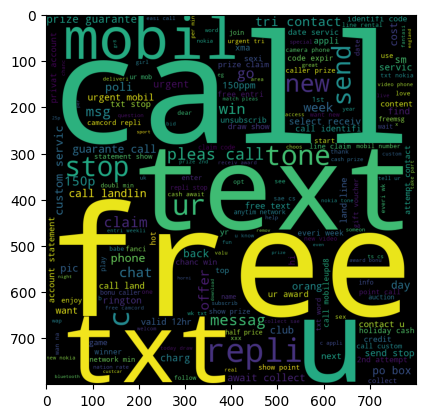

In [49]:
spam_wc=wc.generate(df[df['label']==1]['transformed_text'].str.cat(sep=' '))
plt.imshow(spam_wc)

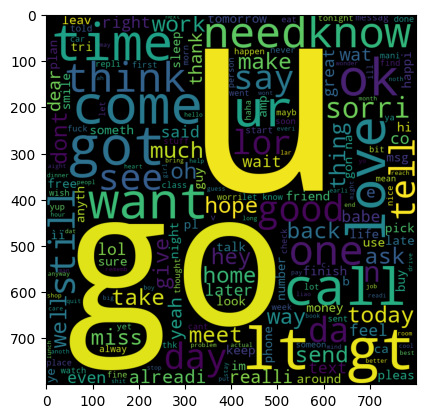

In [50]:
ham_wc=wc.generate(df[df['label']==0]['transformed_text'].str.cat(sep=' '))
plt.imshow(ham_wc)

### Model Building

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [52]:
X=cv.fit_transform(df['transformed_text']).toarray()

In [53]:
X.shape

(5169, 6708)

In [55]:
y=df['label']

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [62]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [63]:
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.8684719535783365
[[772 117]
 [ 19 126]]
0.5185185185185185


In [64]:
bnb.fit(X_train, y_train)
y_pred=bnb.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


In [65]:
mnb.fit(X_train, y_train)
y_pred=mnb.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9738878143133463
[[872  17]
 [ 10 135]]
0.8881578947368421


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()

In [ ]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [70]:
gnb.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.8636363636363636
[[772 117]
 [ 24 121]]
0.5084033613445378


In [71]:
bnb.fit(X_train, y_train)
y_pred=bnb.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9661508704061895
[[885   4]
 [ 31 114]]
0.9661016949152542


In [72]:
mnb.fit(X_train, y_train)
y_pred=mnb.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9613152804642167
[[888   1]
 [ 39 106]]
0.9906542056074766


In [73]:
#multinomial naive bayes with tfidf performs best as of now

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [75]:
models=[DecisionTreeClassifier(), RandomForestClassifier(), SVC(), GradientBoostingClassifier(), XGBClassifier(), AdaBoostClassifier()]

In [81]:
for model in models:
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    print(model)
    print('accuracy=',accuracy_score(y_pred, y_test))
    print(confusion_matrix(y_test, y_pred))
    print('precision=',precision_score(y_test, y_pred))
    print()

DecisionTreeClassifier()
accuracy= 0.9506769825918762
[[867  22]
 [ 29 116]]
precision= 0.8405797101449275

RandomForestClassifier()
accuracy= 0.9671179883945842
[[888   1]
 [ 33 112]]
precision= 0.9911504424778761

SVC()
accuracy= 0.9680851063829787
[[888   1]
 [ 32 113]]
precision= 0.9912280701754386

GradientBoostingClassifier()
accuracy= 0.9632495164410058
[[884   5]
 [ 33 112]]
precision= 0.9572649572649573

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=

c:\Users\anasm\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()
accuracy= 0.9477756286266924
[[868  21]
 [ 33 112]]
precision= 0.8421052631578947



In [82]:
#RandomForestClassifier performs best as of now
#let's see if we get improvement by setting a max features for tfidf vectorizer

In [88]:
df.columns

Index(['label', 'text', 'num_characters', 'num_words', 'num_sentences',
       'transformed_text'],
      dtype='object')

In [83]:
tfidf=TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['transformed_text']).toarray()
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
mnb.fit(X_train, y_train)
y_pred=mnb.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9729206963249516
[[888   1]
 [ 27 118]]
0.9915966386554622


In [84]:
#mnb precision has improved a bit. let's see with random forest
rfc=RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.97678916827853
[[888   1]
 [ 23 122]]
0.991869918699187


In [ ]:
#precision has improved a bit

In [89]:
#adding the number of characters as a feature
X=np.hstack((X, df['num_characters'].values.reshape(-1,1)))
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)  
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9709864603481625
[[887   2]
 [ 28 117]]
0.9831932773109243


In [90]:
# as of now the best model is random forest classifier with only tfidf vectorizer with 3000 features
# no improvement in adding number of characters as feature

In [91]:
#now let's make an ensembled model of random forest and naive bayes
from sklearn.ensemble import VotingClassifier
ensemble=VotingClassifier(estimators=[('rfc', rfc), ('mnb', mnb)], voting='soft')
ensemble.fit(X_train, y_train)
y_pred=ensemble.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9622823984526112
[[889   0]
 [ 39 106]]
1.0


In [92]:
#accuracy is worse but precision is better
#later we'll try with stacking

In [96]:
rfc=RandomForestClassifier()
X=tfidf.fit_transform(df['transformed_text']).toarray()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)
rfc.fit(X_train, y_train)
y_pred=rfc.predict(X_test)
print(accuracy_score(y_pred, y_test))        
print(confusion_matrix(y_test, y_pred))
print(precision_score(y_test, y_pred))

0.9738878143133463
[[888   1]
 [ 26 119]]
0.9916666666666667


In [97]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(rfc, open('model.pkl', 'wb'))